### 1. Load the data and inspect the data

In [27]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load the training data
train = pd.read_csv('../data/training.csv')
# Load variable definitions file
var_def = pd.read_csv('../data/Xente_Variable_Definitions.csv')

In [29]:
# Preview the training data
print("Train shape:", train.shape)
display(train.head())

Train shape: (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
# Check the class distribution
print("\nClass distribution (fraud vs non-fraud):")
print(train['FraudResult'].value_counts(normalize=True))



Class distribution (fraud vs non-fraud):
FraudResult
0    0.997982
1    0.002018
Name: proportion, dtype: float64


In [7]:
# Print the missing values
print("\nMissing values:")
print(train.isnull().sum())


Missing values:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [8]:
# Show the data types
print("\nData types:")
print(train.dtypes)


Data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


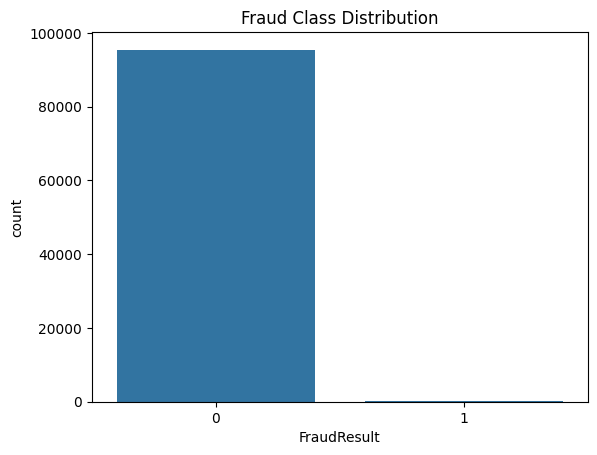

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account


In [10]:
# Plot the fraud distribution
sns.countplot(data=train, x='FraudResult')
plt.title('Fraud Class Distribution')
plt.show()

# Preview variable definitions
display(var_def.head())

### 2. Exploratory Data Analysis

#### 1. What do typical fraudelent activities look like?

In [11]:
# Descriptive statistics grouped by fraud
train.groupby("FraudResult")[["Amount", "Value"]].describe()

Amount                                                   \
               count          mean           std        min       25%   
FraudResult                                                             
0            95469.0  3.627723e+03  4.035711e+04 -1000000.0     -50.0   
1              193.0  1.535272e+06  2.100525e+06  -900000.0  500000.0   

                                               Value                \
                  50%        75%        max    count          mean   
FraudResult                                                          
0              1000.0     2500.0  2400000.0  95469.0  6.763227e+03   
1            600000.0  2000000.0  9880000.0    193.0  1.561820e+06   

                                                                            
                      std    min       25%       50%        75%        max  
FraudResult                                                                 
0            3.999484e+04    2.0     250.0    1000.0     5000.0  2400000.0  
1            2.081227e+06  500.0  500000.0  650000.0  2000000.0  9880000.0

The mean and median transaction amounts are substantially higher for fraudulent transactions compared to non-fraudulent ones. This suggests that fraud tends to involve larger sums of money in this dataset. The presence of very large maximum values and negative minimum values suggests the presence of outliers that might need further investigation or preprocessing.The difference between the mean and median for both groups suggests that the distribution of transaction amounts is likely skewed, possibly to the right (towards larger values).

#### 2. Which Product categories are associated with large fraud amounts?

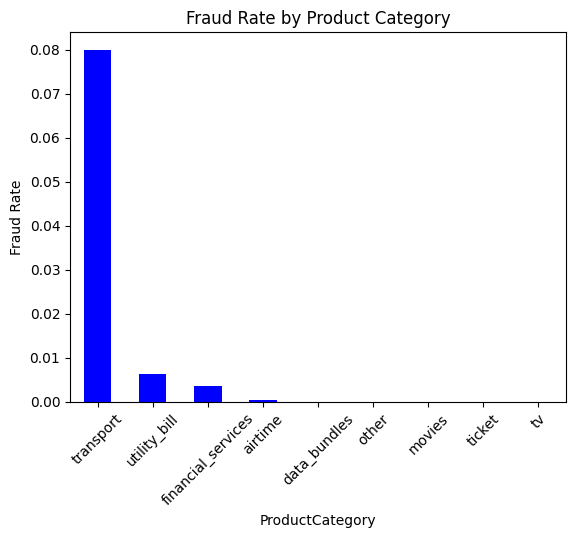

In [13]:
fraud_rate = train.groupby("ProductCategory")["FraudResult"].mean().sort_values(ascending=False)
fraud_rate.plot(kind='bar', color='blue')
plt.title("Fraud Rate by Product Category")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()

There is significantly high fraud rate in the 'transport' category. Understanding the specific types of transactions or processes within this category that are susceptible to fraud could lead to targeted prevention strategies.There is very low fraud rates in most other categories which might suggest that the current fraud detection mechanisms or the nature of these transactions are effective in minimizing fraud. However, continuous monitoring is still important. While lower than 'transport', the fraud rate in 'financial_services' is still noticeable compared to the other low-fraud categories and might benefit from further scrutiny.

#### 3. What Patterns are associated with Fraud?

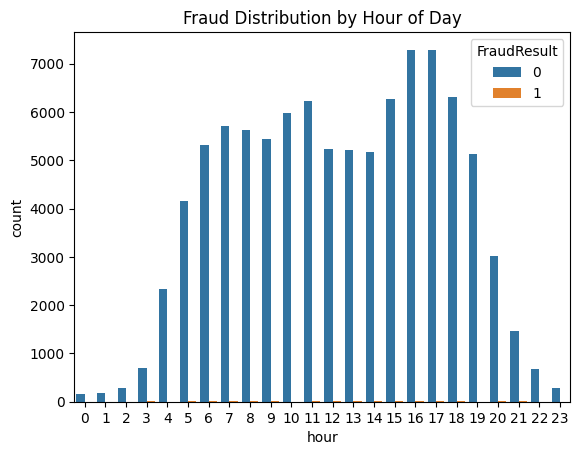

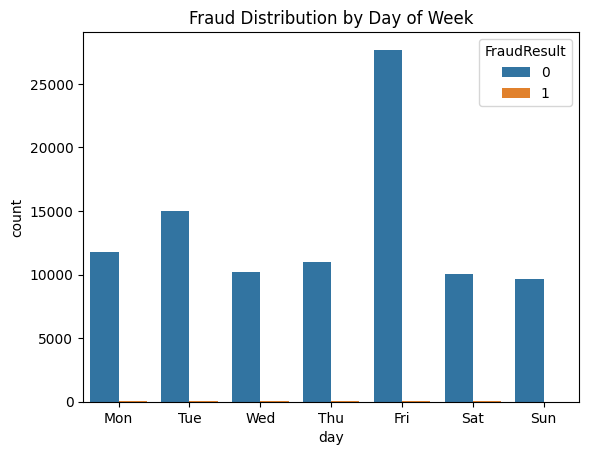

In [14]:
# Convert to datetime first
train['TransactionStartTime'] = pd.to_datetime(train['TransactionStartTime'])

train['hour'] = train['TransactionStartTime'].dt.hour
train['day'] = train['TransactionStartTime'].dt.dayofweek

# Plot fraud by hour
sns.countplot(x='hour', hue='FraudResult', data=train)
plt.title("Fraud Distribution by Hour of Day")
plt.show()

# Plot fraud by day of week
sns.countplot(x='day', hue='FraudResult', data=train)
plt.title("Fraud Distribution by Day of Week")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

#### 4. Which transcation channels provide more risk of fraud?

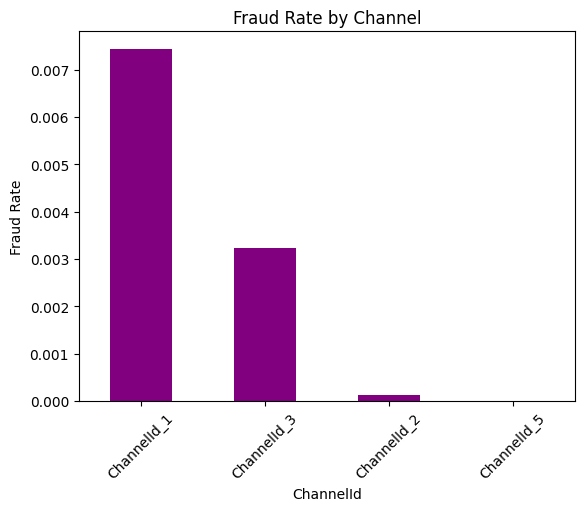

In [16]:
fraud_by_channel = train.groupby("ChannelId")["FraudResult"].mean().sort_values(ascending=False)
fraud_by_channel.plot(kind='bar', color='purple')
plt.title("Fraud Rate by Channel")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()


ChannelId,"Identifies if customer used web,Android, IOS, pay later or checkout."

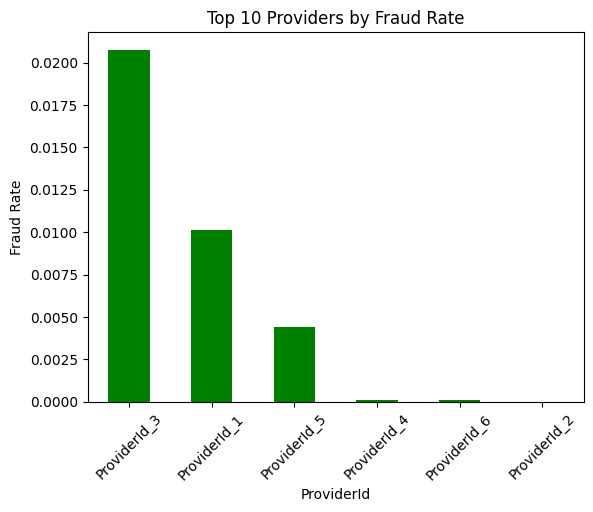

In [17]:
fraud_by_provider = train.groupby("ProviderId")["FraudResult"].mean().sort_values(ascending=False).head(10)
fraud_by_provider.plot(kind='bar', color='green')
plt.title("Top 10 Providers by Fraud Rate")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()

ProviderId,Source provider of Item �bought.

#### 5. How imbalanced is the dataset visually?

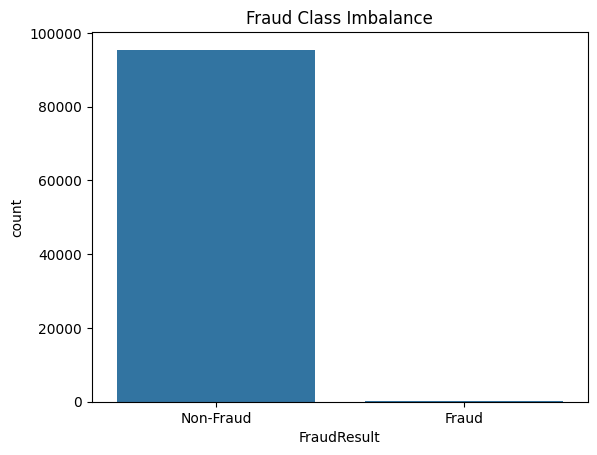

In [19]:
sns.countplot(x='FraudResult', data=train)
plt.title("Fraud Class Imbalance")
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"])
plt.show()

Imbalanced - Non Fraud represent 99.7982 % of the data.

#### 6.  How skewed is transaction Amount?

/Users/dominic/Downloads/Nexford_University/Applied Machine Learning for Analytics/final_project/xente-fraud-detection-challenge/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


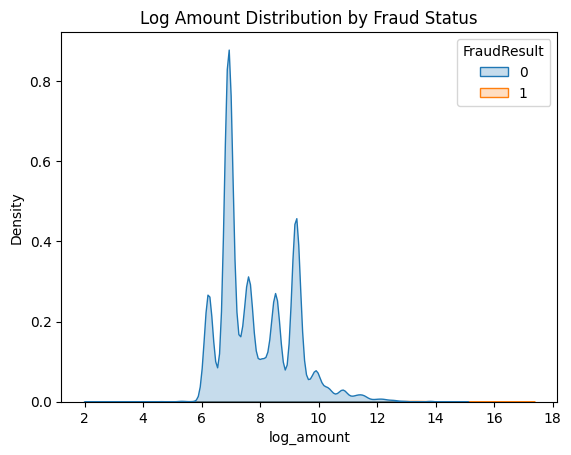

In [22]:
# Log-transform to handle skew
train["log_amount"] = np.log1p(train["Amount"])

sns.kdeplot(data=train, x='log_amount', hue='FraudResult', fill=True)
plt.title("Log Amount Distribution by Fraud Status")
plt.show()

This KDE plot strongly suggests that fraudulent transactions in this dataset tend to involve significantly higher amounts compared to non-fraudulent transactions. This insight is crucial for building effective fraud detection systems.

#### 7. Check correlation among numeric vaariables

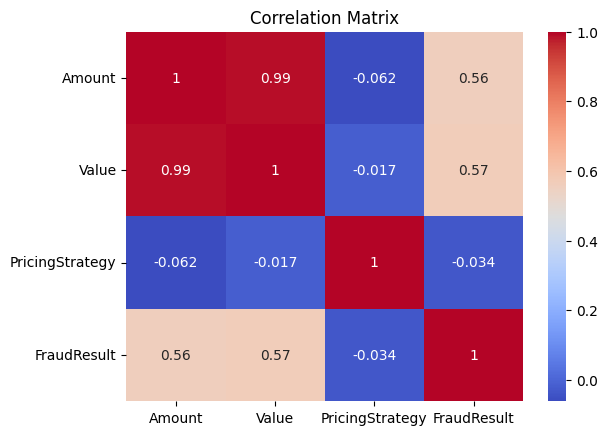

In [25]:
corr = train[['Amount', 'Value', 'PricingStrategy', 'FraudResult']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [26]:
print("Key Insights:")
print("✔ Class imbalance is severe — fraud is < 0.3%")
print("✔ Certain product categories and channels are fraud-prone")
print("✔ Fraud don't seem to happen often during any day of the week than the others.")
print("✔ Transaction amounts in frauds may be skewed")

Key Insights:
✔ Class imbalance is severe — fraud is < 0.3%
✔ Certain product categories and channels are fraud-prone
✔ Fraud don't seem to happen often during any day of the week than the others.
✔ Transaction amounts in frauds may be skewed
